# Rock Paper Scissors Image Classifier




> Subsmission untuk kelas "Belajar Machine Learning untuk Pemula"

> By : Akbar Lucky Basuki



In [1]:
#import library tensorflow, image generator, dan train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split                            #untuk membagi train dan validation

print(tf.__version__)                                                           #check versi tensorflow

2.5.0


In [2]:
#mendownload data file zip rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-30 04:53:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.26MB/s    in 69s     

2021-06-30 04:54:30 (4.47 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#melakukan extract file zip
import os
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')                                                      #menaruh file hasil extract di folder "tmp"
zip_ref.close()

In [4]:
#folder data rockpapaerscissors

import os
base_fold = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
#augmentasi gambar menggunakan imagedatagenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    height_shift_range=0.2,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)                                       #membagi validation sebesar 40%
                                                                                #data training 60%

#mempersiapkan data training
train_generator = train_datagen.flow_from_directory(
                      base_fold,
                      target_size = (100, 150),
                      batch_size=32,
                      class_mode = 'categorical',
                      shuffle=True,
                      subset='training')

#mempersiapkan data validation
validation_generator = train_datagen.flow_from_directory(
                          base_fold,                                            #direktori data
                          target_size = (100, 150),                             #ukuran gambar 100 x 150 pixel
                          batch_size=32,
                          class_mode = 'categorical',                           #menggunakan class categorical
                          shuffle=True,                           
                          subset='validation')                           

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
#membangun model dengan jenis squential menggunakan 4 layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
# compile model dengan 'rmsprop' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [8]:
#latih model yang telah disiapkan tadi dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 38s - loss: 1.0722 - accuracy: 0.4678 - val_loss: 0.8249 - val_accuracy: 0.7695
Epoch 2/20
32/32 - 6s - loss: 0.6716 - accuracy: 0.7364 - val_loss: 0.4427 - val_accuracy: 0.8477
Epoch 3/20
32/32 - 6s - loss: 0.4605 - accuracy: 0.8252 - val_loss: 1.9311 - val_accuracy: 0.4023
Epoch 4/20
32/32 - 6s - loss: 0.4177 - accuracy: 0.8370 - val_loss: 0.3238 - val_accuracy: 0.8906
Epoch 5/20
32/32 - 6s - loss: 0.3120 - accuracy: 0.8722 - val_loss: 0.5154 - val_accuracy: 0.7891
Epoch 6/20
32/32 - 6s - loss: 0.2977 - accuracy: 0.8924 - val_loss: 0.2604 - val_accuracy: 0.9062
Epoch 7/20
32/32 - 6s - loss: 0.2576 - accuracy: 0.9085 - val_loss: 0.5881 - val_accuracy: 0.7812
Epoch 8/20
32/32 - 6s - loss: 0.2337 - accuracy: 0.9199 - val_loss: 0.1222 - val_accuracy: 0.9727
Epoch 9/20
32/32 - 6s - loss: 0.2542 - accuracy: 0.9145 - val_loss: 0.2578 - val_accuracy: 0.9102
Epoch 10/20
32/32 - 6s - loss: 0.2069 - accuracy: 0.9245 - val_loss: 0.1435 - val_accuracy: 0.9453
Epoch 11/20
32/32 

Saving j31qLVBZfstRnWsA.png to j31qLVBZfstRnWsA.png
j31qLVBZfstRnWsA.png
This is "rock"


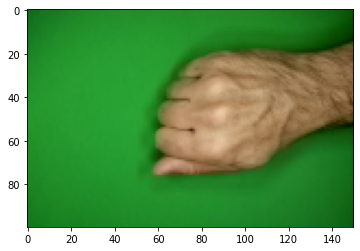

In [9]:
#memilih berkas dari local lalu memprediksi model yang telah dibuat
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('This is "Paper"')
  elif classes[0][1]==1:
    print('This is "rock"')
  elif classes[0][2]==1:
    print('This is "scissors"')
  else:
    print('unknown')